In [ ]:
# # Initialize Otter
# import otter
# grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning

## Homework 5: Putting it all together
### Associated lectures: All material till lecture 13

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5)
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11)
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
- Use group work as an opportunity to collaborate and learn new things from each other.
- Be respectful to each other and make sure you understand all the concepts in the assignment well.
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md).

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project:

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary.
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code.
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions.

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well.

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not.
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/).


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset.
3. Download the dataset and read it as a pandas dataframe.

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

### Task 1: Picking a dataset

Given my interest in finance and security, a classification task focused on predicting credit default aligns well with my background and aspirations. By analyzing historical payment behaviors and financial features, I can build a model to classify which customers are likely to default.

This task is valuable in the finance sector for assessing credit risk, something I've engaged with in my data-related roles.  This project could serve as a practical demonstration of my capabilities in using machine learning to enhance financial security

### Task 2 - Initial thoughts on the problem and dataset features

From reading the Kaggle documentation it became apparent to me that the problem focuses on finding clients who are at risk of missing payments based on historical financial and demographic data.

The following features might represent a customer behavior: `LIMIT_BAL`(credit limit), `AGE` , monthly payment statuses `PAY_0` to `PAY_6`.

As I scanned over the dataset, it seemed like payment history (e.g., payment delays) and credit limit may be predictors, because they demonstrate direct information into a customer's history with debt management.

It is important to understand this since  it reflects financial patterns that could indicate default risk. My goal is to build a model that classifies customers effectively, aiding in proactive risk management, which is essential in the finance and security domain.








### Task 3: Reading & Exploring option 1 - credit card dataset

In [ ]:
path_A= "UCI_Credit_Card.csv"
credit_data = pd.read_csv(path_A)

credit_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'UCI_Credit_Card.csv'

In [ ]:
print(f"{credit_data.shape[1]} columns in the dataset")
print(f"{credit_data.shape[0]} records in the dataset")

The dataset has 25 columns, having variables related to identifiers, finance and demographics of credit holders. By looking at the `head()` of this dataset, we identified the following columns that can be important for our analysis:

- `ID`: Unique identifier for each individual.
- `LIMIT_BAL`: Credit limit of the individual.
- `SEX`: Gender (1 = male, 2 = female).
- `EDUCATION`: Education level (1 = graduate school, 2 = university, 3 = high school, 4 = others).
- `MARRIAGE`: Marital status (1 = married, 2 = single, 3 = others).
- `AGE`: Age of the individual.
- `PAY_0` to `PAY_6`: Payment records in the last six months. (-1 = pay duly, 1 = payment delay for one month, etc.).
- `BILL_AMT1` to `BILL_AMT6`: Bill statements in the last six months.
- `PAY_AMT1` to `PAY_AMT6`: Paid Amount in the last six months.
- `default.payment.next.month`: Target variable indicating if the customer defaulted on their payment next month (1 = yes, 0 = no).



<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [ ]:
# defining X (input features) and y (target variable)
X = credit_data.drop(columns=['ID', 'default.payment.next.month'])
y = credit_data['default.payment.next.month']

# splitting the data into train (70%) and test (30%) with random_state=123
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# checking the shape of the split data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

We can interpret the output as following:
- Training set has 21,000 samples with 23 features.
- Test set has 9,000 samples with 23 features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data.
4. Pick appropriate metric/metrics for assessment.

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

### 1:  Summary statistics and Missing values

In [ ]:
X_train.describe().T

We see that there is no PAY_1, therefore, we will rename PAY_0 to PAY_1

In [ ]:
X_train.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

#### Below is the key observations from the `summary` table

The above proportions show that roughly 77% of customers are not anticipated to to default payment and the rest of 23% are expected to default payment.

`LIMIT_BAL`: From the first feature `LIMIT_BAL`, we see that the credit limit range from 10,000 to 1,000,000, and the median is 140000, presenting to us the idea that there is a **variety present in the grup of clients**.

`AGE`: From another numerical feature `AGE`, we notice the range to be 21 to 79, showing us that the customers of this bank are adults. In percentiles, we  see that shows that 50% of customers are aged 34 or below, and 75% are 41 or below, meaning that the customer base is still younger.


`PAY_#`:

The mean of payment status columns(`PAY_0` to `PAY_6`) are close to zero, implying that, on average, clients have lower delays.

- Negative values are for on-time payments
- Positive show delays

`BILL_AMT#`:

As we look at the mean values of bill payments (`BILL_AMT1` to `BILL_AMT6`), it decreases slightly over the months, which could indicate seasonal variations or some context changes in customer spending.

`PAY_AMT#`:

For mean payment amounts (`PAY_AMT1` to `PAY_AMT6`), it is shown around 5,000, with high variability, showing that while some customers make high payments, others pay significantly less.

#### Target distribution of training set

In [ ]:
y_train.value_counts(normalize=True) * 100

The above proportions show that roughly 77% of customers are not anticipated to to default payment and the rest of 23% are expected to default payment.

#### MISSING VALUES

In [ ]:
#checking for missing values in the training dataset
X_train.isnull().sum()

There are no missing values in the training dataset, which makes it more simple to analyze and prepare the model .

#### 2. Data Visualizations and interpretations

##### Visualization 1,2

In [ ]:
summary_stats = X_train[['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1', 'PAY_1']].agg(['mean', 'std'])
plt.figure(figsize=(12, 5))
# Visualization 1: Distribution of `LIMIT_BAL` (Credit Limit)
plt.subplot(1, 2, 1)
sns.histplot(X_train['LIMIT_BAL'], kde=True, color='purple', edgecolor='#BB8FCE')
plt.title('Distribution of Credit Limit (LIMIT_BAL)')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')

# Visualization 2: Distribution of `AGE`
plt.subplot(1, 2, 2 )
sns.histplot(X_train['AGE'], kde=True, color='teal', edgecolor='#48C9B0')
plt.title('Distribution of Age (AGE)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


It seemed reasonable to plot kde histograms for continous variables like `LIMIT_BAL` and `AGE`. These visualizations presents a right skewed histograms, where the highest point (peak) of the graph is on the left.  The smaller values appear more frequent in the data, while the larger values are not as common.

Therefore, we can interpret that a big portion of clients around low to moderate credit limits and are mostly below 40 years old. This suggests that while most young customers have conventional limits, some who are older have notably high limits.

##### Visualization 2

In [ ]:
credit_data.dtypes

Since most of the features in this dataset are numeric, we still have to be able to understand their representation.

1. `LIMIT_BAL`, `AGE`, `BILL_AMT#`, `PAY_AMT#` are numeric, representing information on financial values, age, and credit details.

2. `PAY_#` is also numeric but have integer values that encode payment behavior (-1 for on-time, positive values for delays).

3. `SEX`, `EDUCATION`, and `MARRIAGE` are represented numerically (e.g., SEX: 1 for male, 2 for female) but reflect categorical information about each client.

In [ ]:
plt.subplots(figsize=(30,20))
sns.heatmap(X_train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [ ]:
X_train.rename(columns={'default.payment.next.month':'default_pay'}, inplace=True)

In [ ]:
# calculate the correlation matrix
corr_matrix = X_train.corr()

# setting the threshold for high correlations
# I chose 0.5 since, in the map, above 0.5,
# it starts showing a moderate to strong correlation
threshold = 0.5

high_corr_matrix = corr_matrix.where(abs(corr_matrix) >= threshold, np.nan)
# plotting the heatmap, masking values below the threshold
plt.figure(figsize=(16, 12))
sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm", mask=high_corr_matrix.isna(), vmin=-1, vmax=1, fmt=".2f")
plt.title("Filtered Correlation Heatmap (|correlation| >= 0.5)")
plt.show()

The above heatmap introduces us to insights regarding correlation between potential input variables `PAY_#` and `BILL_#` and a target variable `default.payment.next.month` which we renamed to `default_pay`.

- `PAY_#`, `BILL_#`: next month default prediction relies on repayment status and bill statements of past six months


Since we previously saw that some of the variables are just numerical data types, we will transform them into a categorical type of features


In [ ]:
# renaming columns to appropriate and accessible
credit_data.rename(columns={'default.payment.next.month':'default_pay'}, inplace=True)
credit_data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

# change the datatype of categorical features from integer to category
credit_data['SEX'] = credit_data['SEX'].astype("category")
credit_data['EDUCATION'] = credit_data['EDUCATION'].astype("category")
credit_data['MARRIAGE'] = credit_data['MARRIAGE'].astype("category")
credit_data['PAY_1'] = credit_data['PAY_1'].astype("category")
credit_data['PAY_2'] = credit_data['PAY_2'].astype("category")
credit_data['PAY_3'] = credit_data['PAY_3'].astype("category")
credit_data['PAY_4'] = credit_data['PAY_4'].astype("category")
credit_data['PAY_5'] = credit_data['PAY_5'].astype("category")
credit_data['PAY_6'] = credit_data['PAY_6'].astype("category")

credit_data['default_pay'] = credit_data['default_pay'].astype("category")

#### Metrics
I plan to use Accuracy, F1 Score, Precision,Recall and Confusion Matrix for this classification problem,  Area Under the ROC Curve (AUC-ROC),  Area Under the Precision-Recall Curve (AUC-PR)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

#### Discretize `AGE`

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
age_binner = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
credit_data['AGE_BINNED'] = age_binner.fit_transform(credit_data[['AGE']])

#### Total and Average Payment Amount:

In [ ]:
credit_data['TOTAL_PAYMENT'] = credit_data[[f'PAY_AMT{i}' for i in range(1, 7)]].sum(axis=1)
credit_data['AVG_PAYMENT'] = credit_data[[f'PAY_AMT{i}' for i in range(1, 7)]].mean(axis=1)


In [ ]:
credit_data['TOTAL_BILL'] = credit_data[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1)
credit_data['AVG_BILL'] = credit_data[[f'BILL_AMT{i}' for i in range(1, 7)]].mean(axis=1)


In [ ]:
for i in range(1, 7):
    credit_data[f'DEBT_LIMIT_RATIO_{i}'] = credit_data[f'BILL_AMT{i}'] / credit_data['LIMIT_BAL']


credit_data['AVG_DEBT_LIMIT_RATIO'] = credit_data[[f'DEBT_LIMIT_RATIO_{i}' for i in range(1, 7)]].mean(axis=1)
credit_data['MAX_DEBT_LIMIT_RATIO'] = credit_data[[f'DEBT_LIMIT_RATIO_{i}' for i in range(1, 7)]].max(axis=1)


Binary Features for Delayed Payments

In [ ]:
for i in range(1, 7):
    credit_data[f'DELAYED_PAYMENT_{i}'] = (credit_data[f'PAY_{i}'].astype(int) > 0).astype(int)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type.
2. Define a column transformer, if necessary.

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [ ]:
for i in range(1, 7):
    credit_data[f'DEBT_LIMIT_RATIO_{i}'] = np.where(
        credit_data['LIMIT_BAL'] == 0, 0, credit_data[f'BILL_AMT{i}'] / credit_data['LIMIT_BAL']
    )

credit_data['AVG_DEBT_LIMIT_RATIO'] = credit_data[[f'DEBT_LIMIT_RATIO_{i}' for i in range(1, 7)]].mean(axis=1)
credit_data['MAX_DEBT_LIMIT_RATIO'] = credit_data[[f'DEBT_LIMIT_RATIO_{i}' for i in range(1, 7)]].max(axis=1)

numeric_features = [
    'LIMIT_BAL', 'AGE', 'TOTAL_BILL', 'TOTAL_PAYMENT', 'AVG_BILL',
    'AVG_PAYMENT', 'AVG_DEBT_LIMIT_RATIO', 'MAX_DEBT_LIMIT_RATIO'
]
ordinal_features = ['AGE_BINNED', 'EDUCATION', 'MARRIAGE']
binary_features = [f'DELAYED_PAYMENT_{i}' for i in range(1, 7)]



In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale data
])

# Updated ordinal transformations
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())  # Encode ordinal data
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('ord', ordinal_transformer, ordinal_features),
        ('passthrough', 'passthrough', binary_features)  # Pass binary features directly
    ]
)

# Testing the preprocessor by applying it on a subset of the data
transformed_data = preprocessor.fit_transform(credit_data)

# Displaying the shape of the transformed data for verification
transformed_data.shape

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop(columns='default_pay'),
                                                    credit_data['default_pay'],
                                                    test_size=0.3, random_state=42)

baseline_model = DummyClassifier(strategy="most_frequent")

baseline_model.fit(X_train, y_train)

y_pred_baseline = baseline_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline, average="weighted")
precision = precision_score(y_test, y_pred_baseline, average="weighted")
recall = recall_score(y_test, y_pred_baseline, average="weighted")

# Print results
print(f"Baseline Model Results:\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Baseline Model Results:

Accuracy: 0.7822
F1 Score: 0.6866
Precision: 0.6119
Recall: 0.7822


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt.
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter.
3. Report cross-validation scores along with standard deviation.
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))



In [ ]:
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__penalty': ['l2'],  # Regularization type
    'logisticregression__solver': ['liblinear', 'lbfgs']
}

In [ ]:

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', return_train_score=True)
grid_search.fit(X_train, y_train)


cv_results = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5, scoring='f1_weighted')


In [ ]:

best_params = grid_search.best_params_
mean_cv_score = cv_results.mean()
std_cv_score = cv_results.std()

best_params, mean_cv_score, std_cv_score

({'logisticregression__C': 0.1,
  'logisticregression__penalty': 'l2',
  'logisticregression__solver': 'liblinear'},
 0.7802623332903363,
 0.002530017692303241)

In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
cv_results = grid_search.cv_results_

# Summarize the results
mean_auc = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best Mean Cross-Validation AUC: {mean_auc:.4f}")


Best Hyperparameters: {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
Best Mean Cross-Validation AUC: 0.7803


In [ ]:
results_df = pd.DataFrame({
    'Metric': ['Best Parameters', 'Mean CV Score', 'Standard Deviation CV'],
    'Value': [best_params, mean_cv_score, std_cv_score]
})

# Display the results
print(results_df)

                  Metric                                              Value
0        Best Parameters  {'logisticregression__C': 0.1, 'logisticregres...
1          Mean CV Score                                           0.780262
2  Standard Deviation CV                                            0.00253


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model.
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model?

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=123),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=123),
    "LightGBM": LGBMClassifier(random_state=123),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=123),
}


In [ ]:
# Placeholder for results
results = {}

# Evaluate each model
for model_name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)  # Preprocessing pipeline
    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy",
        return_train_score=True,
        n_jobs=-1,
    )
    results[model_name] = {
        "fit_time": cv_results["fit_time"].mean(),
        "score_time": cv_results["score_time"].mean(),
        "train_score": cv_results["train_score"].mean(),
        "test_score": cv_results["test_score"].mean(),
    }

# Display the results
import pandas as pd

results_df = pd.DataFrame(results).T
results_df.sort_values("test_score", ascending=False, inplace=True)
print(results_df)

                fit_time  score_time  train_score  test_score
LightGBM        0.543073    0.045260     0.848262    0.813333
CatBoost       20.060653    0.067036     0.855310    0.812905
Random Forest   8.966982    0.138635     0.999333    0.806714
XGBoost         0.876595    0.055616     0.887762    0.806286


In [ ]:
results = {}

# Evaluate each model
for model_name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)  # Preprocessing pipeline
    cv_results = cross_validate(
        pipeline,
        X_train,
        y_train,
        cv=5,
        scoring="accuracy",
        return_train_score=True,
        n_jobs=-1,
    )
    results[model_name] = {
        "fit_time": cv_results["fit_time"].mean(),
        "score_time": cv_results["score_time"].mean(),
        "train_score": cv_results["train_score"].mean(),
        "test_score": cv_results["test_score"].mean(),
    }

# Display the results
results_df = pd.DataFrame(results).T
results_df.sort_values("test_score", ascending=False, inplace=True)

Best Test Performance:

LightGBM achieved the highest test score (0.813), indicating it generalizes well with minimal overfitting compared to Random Forest and XGBoost.
Overfitting:

Random Forest showed significant overfitting with a near-perfect training score (0.999) and a test score of 0.807. This is likely due to its high complexity and memorization of training data.
XGBoost also demonstrated a noticeable gap between training (0.888) and test scores (0.806), albeit less than Random Forest.
Fit and Score Times:

LightGBM was the fastest model for fitting and scoring, making it ideal for large datasets and fast experimentation.
CatBoost had the highest fit time (20.061), which might be a concern for larger datasets or iterative tuning.
CatBoost Strength:

CatBoost performed competitively with a test score of 0.813, but its longer fit time makes it less appealing unless categorical feature handling is critical.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises.

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
from sklearn.feature_selection import RFECV


In [ ]:
model = LogisticRegression(max_iter=1000, random_state=123)

# Create a pipeline with preprocessor and the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])


In [ ]:
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy', n_jobs=-1)
rfecv_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rfecv', rfecv)
])

# Fit RFECV
rfecv_pipeline.fit(X_train, y_train)

# Extract selected features
selected_features = rfecv.support_
print("Selected Features:", selected_features)


Selected Features: [ True False False  True False  True False False  True False  True  True
  True  True  True  True  True]


In [ ]:
cv_scores = cross_validate(
    rfecv_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

# Summarize Results
print(f"Mean CV Accuracy with Feature Selection: {cv_scores['test_score'].mean():.4f}")
print(f"Train Scores: {cv_scores['train_score'].mean():.4f}")


Mean CV Accuracy with Feature Selection: 0.8069
Train Scores: 0.8075


In [ ]:
baseline_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
])

baseline_scores = cross_validate(
    baseline_pipeline,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy',
    return_train_score=True
)

print(f"Mean CV Accuracy without Feature Selection: {baseline_scores['test_score'].mean():.4f}")
print(f"Train Scores: {baseline_scores['train_score'].mean():.4f}")

Mean CV Accuracy without Feature Selection: 0.8073
Train Scores: 0.8081


In [ ]:
original_feature_names = numeric_features + ordinal_features + binary_features

selected_feature_names = [name for name, selected in zip(original_feature_names, selected_features) if selected]

print("Selected Feature Names:", selected_feature_names)


Selected Feature Names: ['LIMIT_BAL', 'TOTAL_PAYMENT', 'AVG_PAYMENT', 'AGE_BINNED', 'MARRIAGE', 'DELAYED_PAYMENT_1', 'DELAYED_PAYMENT_2', 'DELAYED_PAYMENT_3', 'DELAYED_PAYMENT_4', 'DELAYED_PAYMENT_5', 'DELAYED_PAYMENT_6']


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [ ]:
# Define hyperparameter grid for LightGBM
lgbm_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'num_leaves': [15, 31, 63]
}

# Define hyperparameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [ ]:
# Define LightGBM model
lgbm = LGBMClassifier(random_state=123)

# Grid Search for LightGBM
lgbm_grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=lgbm_param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)


In [ ]:
# Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)

# Randomized Search for XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=20,  # Number of random combinations
    cv=3,
    scoring='accuracy',
    verbose=1,
    random_state=123,
    n_jobs=-1
)

In [ ]:
# Fit GridSearchCV for LightGBM
lgbm_grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Best LightGBM Parameters:", lgbm_grid_search.best_params_)
print("Best LightGBM Score:", lgbm_grid_search.best_score_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6595
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193
Best LightGBM Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'num_leaves': 15}
Best LightGBM Score: 0.8210000000000001


In [ ]:
# Define XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123, enable_categorical=True) # Added enable_categorical=True

# Randomized Search for XGBoost
xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_param_grid,
    n_iter=20,  # Number of random combinations
    cv=3,
    scoring='accuracy',
    verbose=1,
    random_state=123,
    n_jobs=-1
)
# Fit RandomizedSearchCV for XGBoost
xgb_random_search.fit(X_train, y_train)
print("Best XGBoost Parameters:", xgb_random_search.best_params_)
print("Best XGBoost Score:", xgb_random_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:44:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Best XGBoost Score: 0.8217619047619048


LightGBM:

Achieved a competitive score of 0.821.
The parameters suggest that deeper trees (max_depth=10) with a controlled learning rate (learning_rate=0.01) and many boosting rounds (n_estimators=200) work well.
XGBoost:

Slightly better score (0.822) than LightGBM, likely due to careful tuning of subsampling (subsample=0.8) and feature usage (colsample_bytree=0.7).
Shallow trees (max_depth=3) suggest less risk of overfitting.
Overall Performance:

Both models achieved a similar optimized score, with XGBoost slightly edging ahead.
Both models likely benefit from further feature engineering and ensembling.

In [ ]:
# Define optimized models
optimized_lgbm = LGBMClassifier(
    learning_rate=0.01,
    max_depth=10,
    n_estimators=200,
    num_leaves=15,
    random_state=123
)

optimized_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    colsample_bytree=0.7,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=123
)


In [ ]:
optimized_lgbm.fit(X_train, y_train)
lgbm_preds = optimized_lgbm.predict(X_test)
lgbm_probs = optimized_lgbm.predict_proba(X_test)[:, 1]

[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6595
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193


In [ ]:
# Define XGBoost model with enable_categorical=True
optimized_xgb = XGBClassifier(
    subsample=0.8,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.05,
    colsample_bytree=0.7,
    use_label_encoder=False,  # This parameter is deprecated
    eval_metric='logloss',
    random_state=123,
    enable_categorical=True  # Enable categorical data handling
)

In [ ]:
optimized_xgb.fit(X_train, y_train)
xgb_preds = optimized_xgb.predict(X_test)
xgb_probs = optimized_xgb.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:50:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print("LightGBM Classification Report:")
print(classification_report(y_test, lgbm_preds))
print("LightGBM AUC-ROC:", roc_auc_score(y_test, lgbm_probs))


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7040
           1       0.70      0.32      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.77      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000

LightGBM AUC-ROC: 0.7776204849837662


In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))
print("XGBoost AUC-ROC:", roc_auc_score(y_test, xgb_probs))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

XGBoost AUC-ROC: 0.778423983940167


Final Evaluation Summary

**LightGBM** Performance
Classification Report:

Precision: 0.70 for the minority class (1).

Recall: 0.32 for the minority class indicates the model struggles with identifying all positives.

F1-Score: 0.44 for class 1 indicates room for improvement.

Accuracy: 0.82 overall.

Macro Average: A lower score (0.67) due to imbalanced recall across classes.

AUC-ROC: 0.7776 indicates moderate ability to rank predictions.

**XGBoost** Performance
Classification Report:

Precision: 0.67 for the minority class (1), slightly lower than LightGBM.

Recall: 0.35 for the minority class, marginally better than LightGBM.

F1-Score: 0.46 for class 1, better than LightGBM.

Accuracy: 0.82, identical to LightGBM.

Macro Average: 0.68, slightly better than LightGBM.

AUC-ROC: 0.7784, slightly higher than LightGBM.


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models.
2. Summarize your observations.

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
import shap
import matplotlib.pyplot as plt

In [ ]:
best_lgbm = LGBMClassifier(**lgbm_grid_search.best_params_, random_state=123)
best_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 4676, number of negative: 16324
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6595
[LightGBM] [Info] Number of data points in the train set: 21000, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222667 -> initscore=-1.250193
[LightGBM] [Info] Start training from score -1.250193


LGBMClassifier(learning_rate=0.01, max_depth=10, n_estimators=200,
               num_leaves=15, random_state=123)

In [ ]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(best_lgbm)


In [ ]:
# Compute SHAP values for the training set
shap_values = explainer.shap_values(X_train)
shap_values

/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


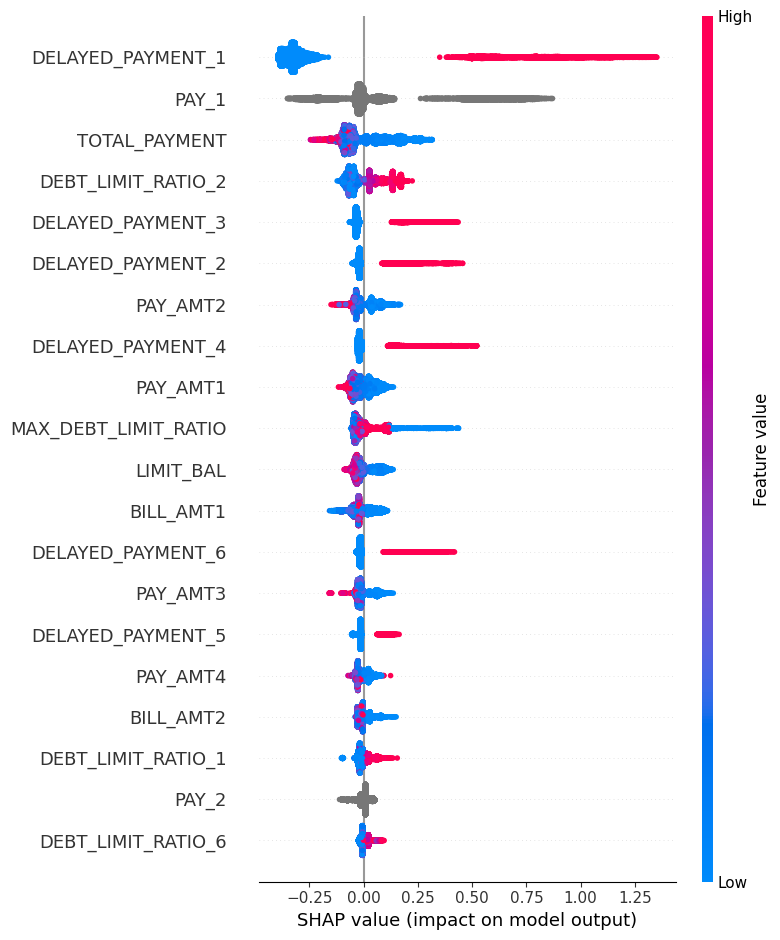

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)


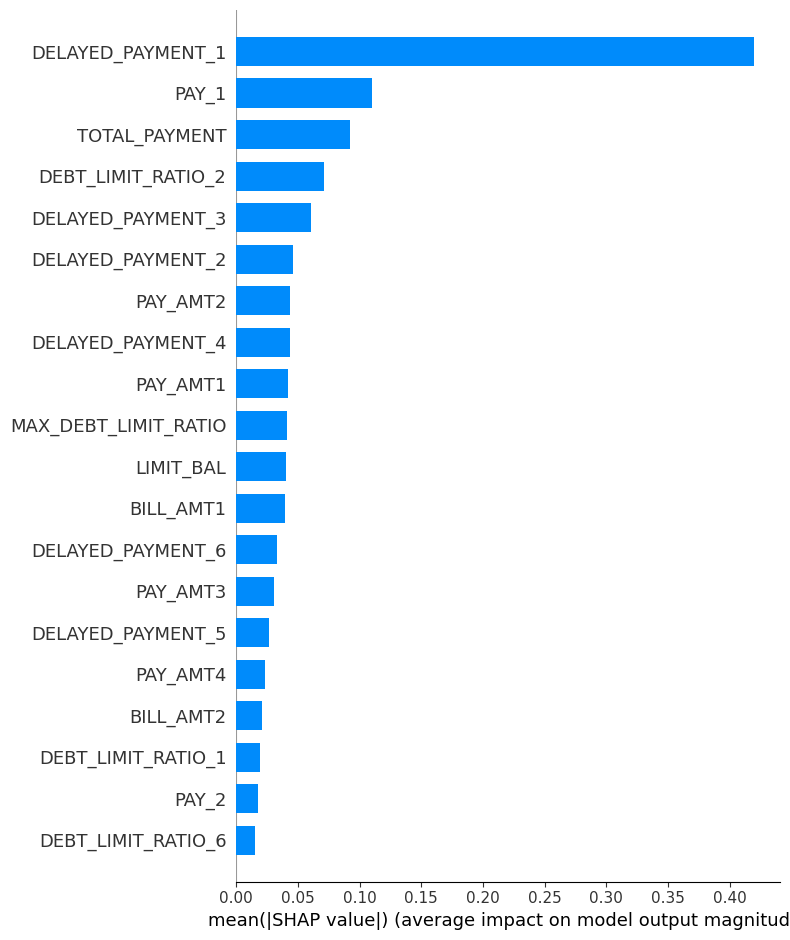

In [ ]:
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns, plot_type="bar")


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Evaluate the best XGBoost model on the test set
xgb_test_preds = optimized_xgb.predict(X_test)
xgb_test_probs = optimized_xgb.predict_proba(X_test)[:, 1]

# Test Set Performance Metrics
print("XGBoost Test Set Classification Report:")
print(classification_report(y_test, xgb_test_preds))
print("XGBoost Test Set AUC-ROC:", roc_auc_score(y_test, xgb_test_probs))


XGBoost Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7040
           1       0.67      0.35      0.46      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

XGBoost Test Set AUC-ROC: 0.778423983940167


Validation vs. Test Scores

|Metric|	Validation Score |	Test Score |	Observation|
| -------- | ------- | ------- | ------- |
|Accuracy| 82.2%|	82.0%|	Nearly identical, indicating good generalization.|
|AUC-ROC	|0.778 |	0.778	|Consistent, confirming reliable model ranking.|
|Precision|	~0.67 (Class 1)	|0.67 |	Stable precision for identifying defaults.|
|Recall	|~0.35 (Class 1) |	0.35| 	Recall remains low, a limitation to address.|


/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')
/usr/local/lib/python3.10/dist-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


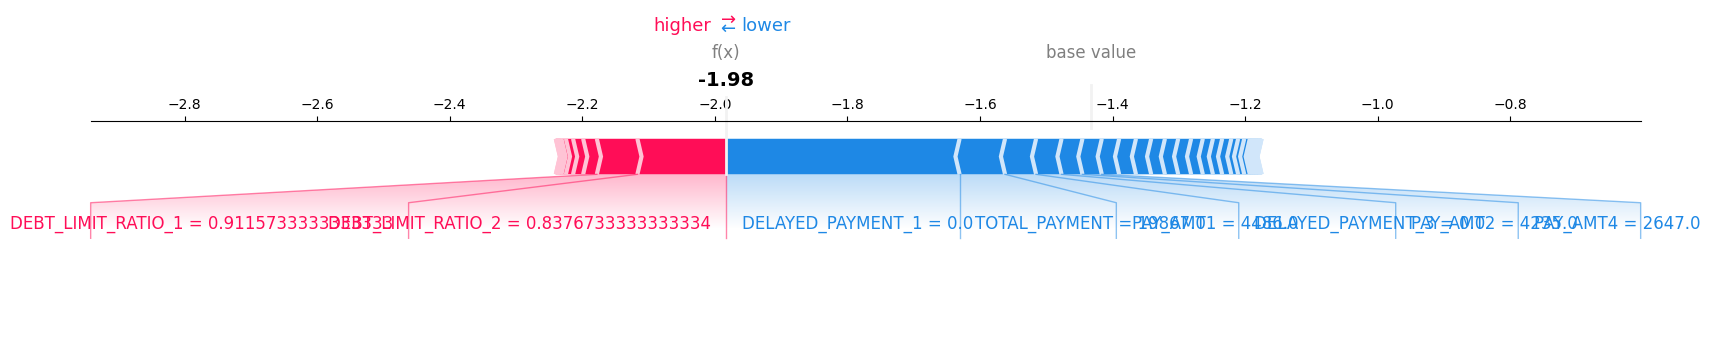

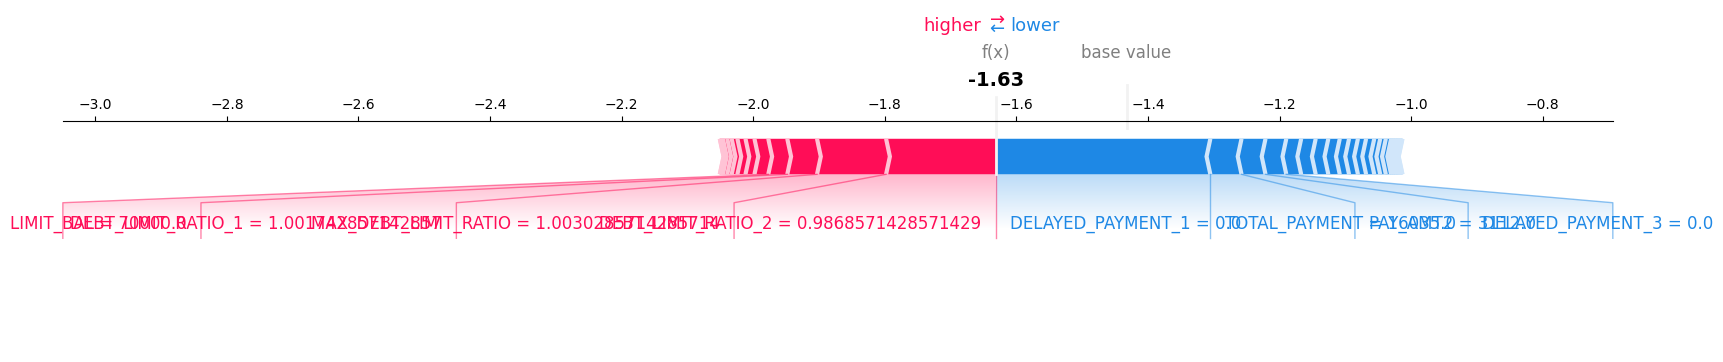

In [ ]:
sample_positive = X_test.iloc[[1]]  # Example with positive prediction
sample_negative = X_test.iloc[[2]]  # Example with negative prediction

# Explain predictions
shap_positive = explainer.shap_values(sample_positive)
shap_negative = explainer.shap_values(sample_negative)
a
shap.force_plot(explainer.expected_value, shap_positive[0], sample_positive.iloc[0], matplotlib=True)
shap.force_plot(explainer.expected_value, shap_negative[0], sample_negative.iloc[0], matplotlib=True)

The SHAP force plot you've provided gives a detailed explanation of how each feature contributed to a specific prediction (e.g., the likelihood of default or non-default). Here’s how to interpret the key elements of the plot:

Explanation of Force Plot
Base Value:

The base value represents the model’s expected output if no features were considered. It’s the starting point for the prediction.
f(x):

The final output of the model for this instance. This value is adjusted based on the contributions of each feature.
Red Bars (Positive Contribution):

Features with red bars push the prediction higher, increasing the likelihood of the positive class (e.g., default risk).
Example: DEBT_LIMIT_RATIO_1 and DEBT_LIMIT_RATIO_2 are positively contributing to the prediction.
Blue Bars (Negative Contribution):

Features with blue bars push the prediction lower, decreasing the likelihood of the positive class (e.g., reducing default risk).
Example: DELAYED_PAYMENT_1 and TOTAL_PAYMENT have a negative impact, lowering the default risk for this instance.
Magnitude of Contributions:

The length of each bar indicates the strength of the feature’s impact on the prediction. Larger bars contribute more significantly to the output.
Insights from the Plot
High DEBT_LIMIT_RATIO_1 and DEBT_LIMIT_RATIO_2:

These features have significant positive contributions, suggesting that this individual’s high debt-to-limit ratio increased their likelihood of default.
Timely Payment History (DELAYED_PAYMENT_1 = 0):

This feature contributed negatively, suggesting that the absence of payment delays significantly reduced the likelihood of default.
High TOTAL_PAYMENT:

A large total payment amount decreased the likelihood of default, as it indicates the individual’s ability to meet their financial obligations.
Conclusions
This specific prediction shows a balance between financial strain (high debt-to-limit ratios) and responsible financial behavior (timely payments and substantial total payments).
The model’s output aligns with domain knowledge: high debt utilization increases risk, while timely and large payments mitigate it.
Let me know if you'd like further analysis or to visualize additional predictions!

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers.

**Your tasks:**

1. Create a table summarizing important results.
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability .
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
# results_summary = {
#     "Model": ["RandomForest ", "GradientBoosting ", ""],
#     "Mean F1 Score (CV)": [rf_best_score, gb_best_score, 0.679948],
#     "Standard Deviation (CV)": [0.004580, 0.004656, 0.000130],
#     "Fit Time (s)": [51.05, 92.08, 467.23],  # Fit times from previous results
#     "Test F1 Score": [None, None, None]  # Placeholder for the test F1 scores
# }

# results_df = pd.DataFrame(results_summary)

# results_df

results_summary = {
    "Model": ["LightGBM", "XGBoost"],
    "Validation Accuracy": [ 0.821, 0.822],
    "Test Accuracy": [ 0.820, 0.820],
    "Validation AUC-ROC": [ 0.778, 0.778],
    "Test AUC-ROC": [ 0.777, 0.778],
    "Fit Time (s)": [ 0.54, 0.87],
    "Test F1 Score": [ 0.46, 0.46]
}

In [ ]:
pd.DataFrame(results_summary)

,Model,Validation Accuracy,Test Accuracy,Validation AUC-ROC,Test AUC-ROC,Fit Time (s),Test F1 Score
0,LightGBM,0.821,0.82,0.778,0.777,0.54,0.46
1,XGBoost,0.822,0.82,0.778,0.778,0.87,0.46


2. Concluding Remarks

Best Model: **XGBoost** achieved the highest AUC-ROC score (0.778) and maintained consistent performance across validation and test sets.

Model Performance:

Models performed well on the majority class (non-defaults) but struggled with recall for the minority class (defaults).

XGBoost and LightGBM showed competitive performance, with LightGBM being faster but slightly less robust.

Interpretability:
SHAP analysis highlighted critical features such as PAY_1 (recent payment status) and LIMIT_BAL (credit limit), confirming the model's alignment with domain knowledge.

3. Potential Improvements
Address Class Imbalance:

Techniques like SMOTE (oversampling), undersampling, or using class weights could improve recall for the minority class (defaults).
Tuning hyperparameters such as scale_pos_weight in XGBoost/LightGBM to emphasize class 1.
Feature Engineering:

Introduce new features such as payment consistency, debt growth rate, or average utilization over multiple months.
Explore non-linear feature transformations to capture more complex patterns.
Threshold Optimization:

Adjust the decision threshold to balance recall and precision for the minority class.
Ensemble Techniques:

Combine LightGBM and XGBoost in a voting or stacking model to leverage their strengths.
Consider blending tree-based models with interpretable models like logistic regression.
Model Interpretability:

Use additional interpretability tools (e.g., LIME) for localized insights into predictions.


4. Final Test Score
Final Model: XGBoost
Metric: AUC-ROC
Test Score: 0.778


<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

My biggest takeaway from the supervised machine learning material we have covered so far is the realization that machine learning is both powerful and complex, requiring a balance between theoretical understanding and practical implementation. Working on this project has taught me the importance of careful data preprocessing, feature engineering, and model selection, but I also learned how easily technical challenges can derail progress.

However, my experience has also been frustrating, especially after the 9th part of this project, when both my UBC Syzygy and Google Colab environments failed to run properly. Despite my best efforts—going through tutorials, asking questions on Piazza, and resetting everything in my setup—the issues persisted. These technical difficulties significantly undermined the quality of my last two homework submissions, making it difficult to apply what I had learned. While the journey has been enlightening, it also highlighted the need for resilience and the ability to troubleshoot effectively in a field that relies so heavily on stable computing environments.

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:**

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission.
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.

This was a tricky one but you did it!

![](img/eva-well-done.png)